In [4]:
import numpy as np
import matplotlib.pyplot as plt

r_infty = 3.5699456

## Expert level

### Устойчивость и асимптотическая устойчивость

Неподвижная точка $x^*$ называется устойчивой, если

$$
\forall \varepsilon > 0\ \exists \delta > 0:\ |x_0 - x^*| < \delta \implies |x_n - x^*| < \varepsilon\ \forall n.
$$

Неподвижная точка $x^*$ называется асимптотически устойчивой, если она устойчива и

$$
\exists \delta_0 > 0:\ |x_0 - x^*| < \delta_0 \implies x_n \xrightarrow[n \to \infty]{} x^*.
$$

То есть устойчивость говорит нам о том, что есть «коридор» вокруг $x^*$ и $x_n$ находится в этом коридоре при любых $n$. А асимптотическая устойчивость добавляет к этому условию сходимость.

Также говорят, что решение устойчиво по Ляпунову, асимптотически устойчиво по Ляпунову.



#### Expert 1

Следует ли асимптотическая устойчивость $x^*$ из условия

$$
\exists \delta_0 > 0:\ |x_0 - x^*| < \delta_0 \implies x_n \xrightarrow[n \to \infty]{} x^* \; ?
$$

Обоснуйте свой ответ.

Нет, не следует. Мы знаем что последовательность сходится, но у нас нет никакой гарантии что её можно ограничить последовательность любым ${\Large \varepsilon}$. <br>
Контрпример:
$$
x_{n+1}=
\begin{cases}
0,& x_n=0,\\
\lfloor x_n + 1 \rfloor \; mod \; 10,& x > 0.
\end{cases}
$$
Такая последовательность cходится к нулю, но её нельзя ограничить произвольным положительным ${\Large \varepsilon}$.

#### Expert 2

Докажите или опровергните утверждение.

При $r \in (0; 1)$ неподвижная точка $x^* = 0$ является устойчивой. Является ли она асимптотически устойчивой?


Т.к. последовательность монотонно убывает при $0<r<1$, то:
$$
\forall \varepsilon > 0\ \exists \delta = \varepsilon:\ |x_0 - x^*| < \delta \implies |x_n - x^*| < \varepsilon\ \forall n.
$$
Докажем что $\lim_{n\to \infty}x_n = x^{*} = 0$: <br>
По теореме о двух городовых при  раз $r \in (0;1)$ 0 $\leq$ $x_{n}$ < $r^n$ и известно $^{+}$ что $r^n \to 0$ при $n \to \infty$, то $\lim_{n\to \infty}x_n = x^{*} = 0$ чтд.<br>
($^{+}$ В случае чего тривиально доказывается по определению($ N = max(1, \log_{r}{\Large \varepsilon})$))

#### Expert 3

Докажите, что точка $x^* = 0$ при $r \in (2; 3)$ является неустойчивой.


Чтобы доказать неустойчивость, нужно показать что
$$
\exists \varepsilon > 0\ \forall \delta > 0:\ |x_0 - x^*| < \delta \implies \exists n > 0, |x_n - x^*| \geq \varepsilon.
$$
Возьмем $\varepsilon = \dfrac{1}{2}$, тогда для любого $\delta > 0$ можно выбрать $x_0 = \min(\dfrac{\delta}{2}, \dfrac{\varepsilon}{2})$,<br> тогда $x_0 < \dfrac{1}{2} \implies x_1 = r * x_0 * (1 - x_0) > x_0$ при $r > 2$ тк $1 - x_0 > \dfrac{1}{2}$. <br>
Обобщая получаем, что x_n монотонно возрастает, если не пересекает $\dfrac{1}{2}$. <br>
Предположим что $x_n < \dfrac{1}{2}$ для любого n, но $x_n \geq \dfrac{r}{2} x_{n-1}$ $\implies$ $ x_n \geq \dfrac{r}{2}^{n} x_0$. <br>
Так как $\dfrac{r}{2} > 1$, то при $n = \lfloor \log_{\dfrac{r}{2}}{\dfrac{1}{2 x_0}}  + 1 \rfloor: \quad \dfrac{r}{2}^{n} x_0 > \dfrac{1}{2}$ $\implies$ $x_n > \dfrac{1}{2}$ противоречие.$\implies$<br>
$\implies \exists n: x_n > \dfrac{1}{2} = \varepsilon$<br>
чтд. <br>

### Чувствительность к начальным условиям

Система проявляет чувствительность к начальным условиям, если

$$
\exists \delta > 0\ \forall x_0\ \forall \varepsilon > 0\ \exists y_0:\ |x_0 - y_0| < \varepsilon \wedge |x_n - y_n| > \delta.
$$

NB: $\delta$ фиксировано один раз для всей системы, иначе, если бы $\delta$ зависело от $x_0$ или $\varepsilon$, его можно было бы «подгонять» под конкретную пару траекторий $x_n$, $y_n$.

NB: при $r = 4$ система, заданная логистическим отображением, чувствительна к начальным условиям.

#### Expert 4

Напишите функцию, которая для заданных $x_0$, $y_0 = x_0 + \varepsilon$, $r$ строит две траектории лестницы Ламерея на одном графике. Постройте этот график для $r = 4$. Как можно интерпретировать результаты?

In [5]:
def f(x: float, r: float) -> float:
    return r * x * (1 - x)


def f_trajectory(r: float, esp: float = 0.001):
    x = 0
    while x < 1:
        yield x, f(x, r)
        x += esp

In [6]:
def lamerey_stair(r: float, x0: float, n: int, func: callable, gen: callable, esp: float = 0.001,
                  color: str = "r") -> None:
    seq1 = [x0]
    for x in range(1, n):
        seq1.append(func(seq1[-1], r))

    plt.title(f'Лестница Ламерея для {func.__name__} при r = {r}')
    data = np.array(list(gen(r, esp=esp)))
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y, label='$x_{n} = f(x_{n-1})$')
    plt.plot(x, x, label='$y = x$', color='k', linestyle='--')
    plt.plot([seq1[0], seq1[0]], [0, seq1[1]], color=color)
    plt.plot([seq1[0], seq1[1]], [seq1[1], seq1[1]], color=color)
    for i in range(1, len(seq1) - 1):
        plt.plot([seq1[i], seq1[i]], [seq1[i], seq1[i + 1]], color=color)
        plt.plot([seq1[i], seq1[i + 1]], [seq1[i + 1], seq1[i + 1]], color=color)
    plt.xlim(0, 1)
    plt.ylim(0, max(max(y), 1))
    plt.legend()

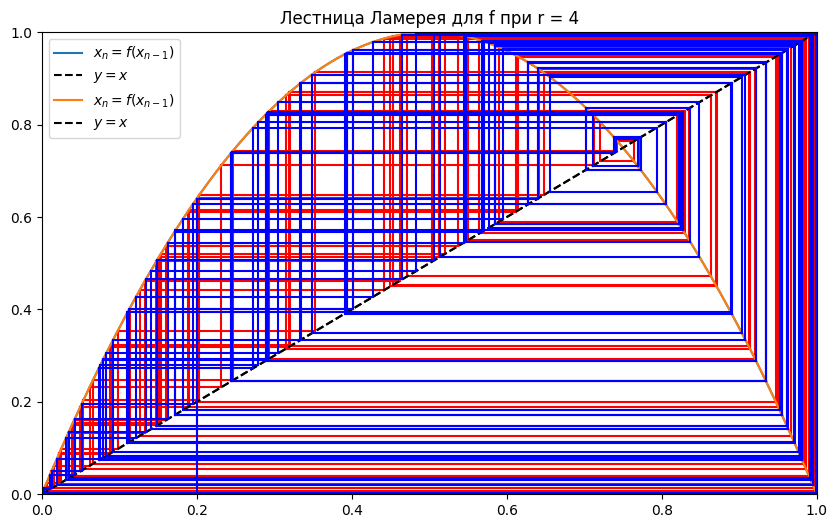

In [7]:
esp = 1e-6
plt.figure(figsize=(10, 6))
lamerey_stair(r=4, x0=0.2, n=100, func=f, gen=f_trajectory, esp=esp, color="red")
lamerey_stair(r=4, x0=0.2 + esp, n=100, func=f, gen=f_trajectory, esp=esp, color="blue")


Начиная с некоторого номера, траектории начинают сильно расходиться, что иллюстрирует чувствительность к начальным условиям.

>В контексте точечного отображения установившимся режимом называют такое поведение последовательности $\{x_n\}_{n=0}^\infty$, при котором, начиная с некоторого номера $N$, все последующие значения либо:
> 1. стремятся к фиксированной точке $x^*$;
> 2. попадают в цикл кратности $p$;
> 3. проявляют поведение, при котором траектория не сходится ни к точке, ни к конечному циклу, но при этом остаётся ограниченной и чувствительной к начальным условиям.

### Бифуркации и бифуркационная диаграмма

Бифуркацией называют смену установившегося режима поведения системы, как правило, вследствие изменения управляющего параметра. Момент такой смены называют точкой бифуркации.

Отметим, что бифуркациями считаются не только переходы между режимами 1–3, но и изменения кратности цикла.

Одним из способов исследования отображений является построение бифуркационной диаграммы. Такая диаграмма демонстрирует, как меняется поведение системы в зависимости от управляющего параметра.

Для построения бифуркационной диаграммы рекомендуется воспользоваться следующим алгоритмом:

1. Стартуя из произвольной начальной точки $x_0$ и выбрав какое-то $r$, в результате итераций получаем значения $x_n = \{x_1, x_2, x_3, \dots\}$. Число итераций выбирается достаточно большим (порядка тысячи).
2. Из всего набора $x_n$ оставляется несколько последних, например, $20$–$100$ значений. Эти значения записываются вместе со значением $r$.
3. То же самое проделывается и для других случайных точек и того же $r$.
4. Пункты 1 и 2 повторяются для другого значения $r$.
5. Записанные числа отображаются в зависимости от $r$. То есть на экране должны появиться все точки, которые были записаны при данном $r$.


#### Expert 5

1. Постройте бифуркационную диаграмму логистического отображения.
2. Проанализируйте: как интерпретировать полученный график?
3. Где на диаграмме находится $r_\infty$? Как ведёт себя система до $r_\infty$? После?

In [8]:
def bifurcation_diagram(func: callable, x0: float, n_iterations: int,
                        n_last: int) -> None:
    r_values = np.linspace(0, 4.0, 100000)
    for i in range(n_iterations):
        x0 = func(x0, r_values)
        if i >= (n_iterations - n_last):
            plt.plot(r_values, x0, ',k')

    plt.title(f'Бифуркационная диаграмма {func.__name__}')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.xlim(0, 4.0)
    plt.ylim(0, 1)

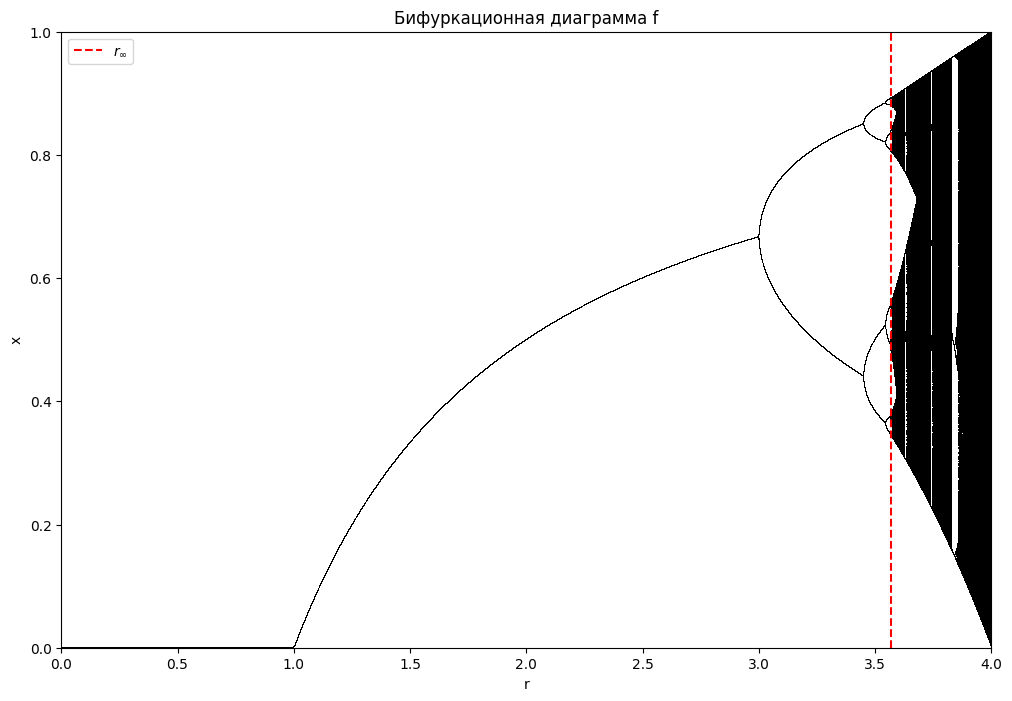

In [9]:
plt.figure(figsize=(12, 8))
bifurcation_diagram(func=f, x0=0.5, n_iterations=1000, n_last=100)
plt.axvline(x=r_infty, color='r', linestyle='--', label='$r_{\\infty}$')
plt.legend()

| $$r$$           | Поведение системы                                  |
|-----------------|----------------------------------------------------|
| (0, 1)          | Схождение к неподвижной точке $x^* = 0$            |
| (1, 3)          | Схождение к неподвижной точке $x^* = \dfrac{r-1}{r}$ |
| (3, $r_\infty$) | Периодические бифуркации с удвоением периода       |
| ($r_\infty$, 4) | Хаотическое поведение с отдельными окнами порядка  |

Бифуркационное дерево в окрестности точки перехода к хаосу обладает самоподобной структурой, которая воспроизводится во всё более мелких масштабах. Это свойство называется масштабной инвариантностью. При увеличении масштаба бифуркационной диаграммы в окрестности критической точки по горизонтальной оси в $\delta = 4.669209\ldots$ (универсальная постоянная Фейгенбаума), а по вертикальной оси – в $\alpha = -2.5029$ (вторая универсальная постоянная Фейгенбаума; знак минус означает изменение ориентации координатных осей), мы получим рисунки, совпадающие с исходной бифуркационной диаграммой.



#### Expert 6

С помощью увеличения фрагмента около $r \approx 3.83$ визуализируйте фрактальную структуру (самоподобие) бифуркационной диаграммы.

In [10]:
def bifurcation_diagram_zoom(func: callable,
                             x0: float,
                             n_iterations: int,
                             n_last: int,
                             r_range: tuple[float, float],
                             y_range: tuple[float, float]) -> None:
    r_values = np.linspace(r_range[0], r_range[1], 100000)
    x = np.full_like(r_values, x0)
    for i in range(n_iterations):
        x = func(x, r_values)
        if i >= (n_iterations - n_last):
            plt.plot(r_values, x, ',b', alpha=0.25)

    plt.title(f'Бифуркационная диаграмма {func.__name__} (увеличение)')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.xlim(r_range)
    plt.ylim(y_range)


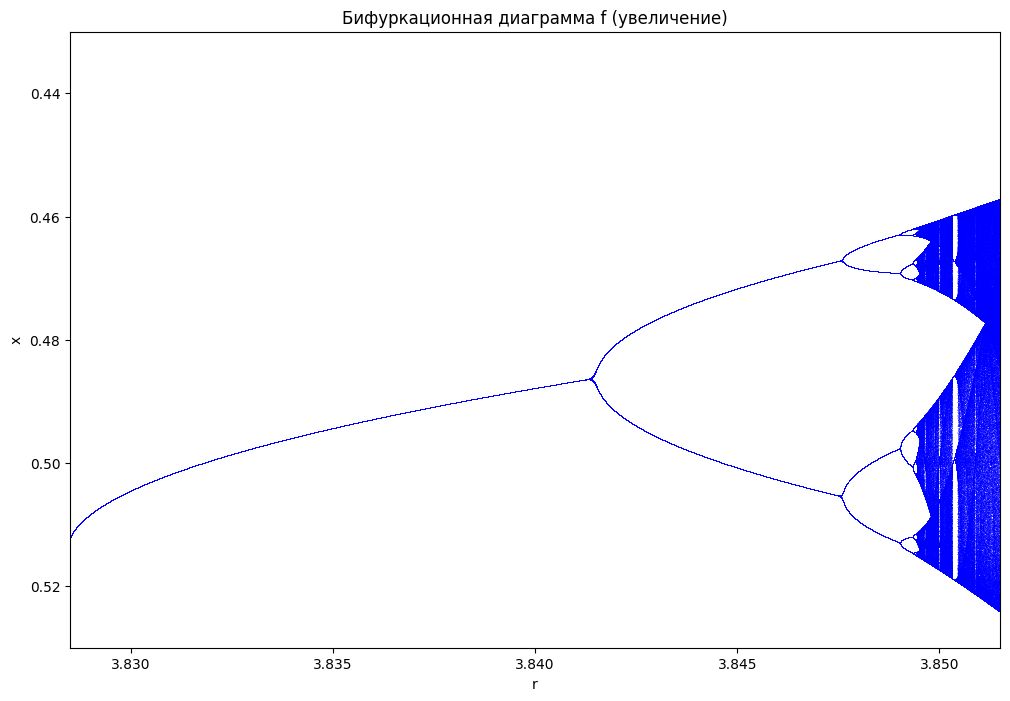

In [28]:
plt.figure(figsize=(12, 8))
r_center = 3.84
r_width = 0.023
y_center = 0.48
y_height = -0.1
bifurcation_diagram_zoom(func=f, x0=0.5, n_iterations=1000, n_last=200,
                         r_range=(r_center - r_width / 2, r_center + r_width / 2),
                         y_range=(y_center - y_height / 2, y_center + y_height / 2))

Интересно, что при $r > r_\infty$ на бифуркационной диаграмме логистического отображения возникают так называемые «окна периодичности» – области с ярко выраженными циклами конечной длины.

#### Expert 7

Приближённо найдите значения $r$, при которых возникают циклы с периодом $3$, $5$, $6$. Отобразите область(-и) бифуркационной диаграммы с соответствующими окнами периодичности.

In [52]:
def highlight_windows(func: callable,
                      x0: float,
                      n_iterations: int,
                      n_last: int,
                      r_range: tuple[float, float],
                      win_configs: list[tuple[int, str]] | None = None,
                      num_r_steps: int = 2000,
                      decimals: int = 4) -> None:
    r_values = np.linspace(r_range[0], r_range[1], num_r_steps)

    for r in r_values:
        x = x0
        for _ in range(n_iterations - n_last):
            x = func(x, r)

        x_last = []
        for _ in range(n_last):
            x = func(x, r)
            x_last.append(x)

        period = len(np.unique(np.round(x_last, decimals)))

        if win_configs is not None:
            for p, color in win_configs:
                if period == p:
                    plt.axvline(x=r, color=color, alpha=0.1)
                    break
        else:
            if 1 < period < n_last / 4:
                plt.axvline(x=r, color='g', alpha=0.1)


/var/folders/j4/sccx6ys16c3927wv6rvgtn3c0000gn/T/ipykernel_27589/2360770439.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


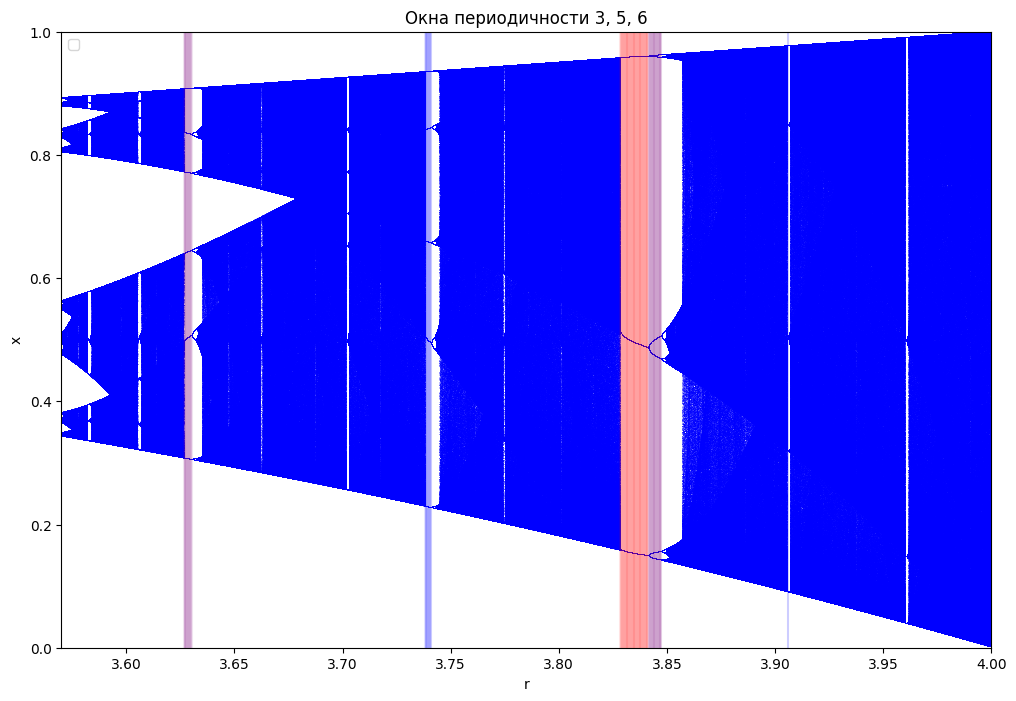

In [53]:
plt.figure(figsize=(12, 8))

bifurcation_diagram_zoom(func=f, x0=0.5, n_iterations=1000, n_last=200,
                         r_range=(r_infty, 4),
                         y_range=(0, 1))

configs = [
    (3, 'red'),
    (5, 'blue'),
    (6, 'purple')
]

highlight_windows(func=f, x0=0.5, n_iterations=1000, n_last=200,
                  r_range=(r_infty, 4), win_configs=configs)

plt.title('Окна периодичности 3, 5, 6')
plt.legend()
plt.show()


#### Expert 8:

Для заданного вариантом отображения $g(x_n)$:

1. Численно или аналитически найдите верхнюю и нижнюю границы параметра $r$, при котором точка $x^* = 0$ является устойчивой / неустойчивой.
2. Постройте бифуркационную диаграмму. Отметьте сходства или различия с диаграммой логистического отображения.
3. Визуализируйте окна периодичности, если они есть.

In [55]:
def g(x: float, r: float) -> float:
    return r * x * (1 - x) * (2 + x)

/var/folders/j4/sccx6ys16c3927wv6rvgtn3c0000gn/T/ipykernel_27589/750694998.py:2: RuntimeWarning: overflow encountered in multiply
  return r * x * (1 - x) * (2 + x)
/var/folders/j4/sccx6ys16c3927wv6rvgtn3c0000gn/T/ipykernel_27589/3915724128.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


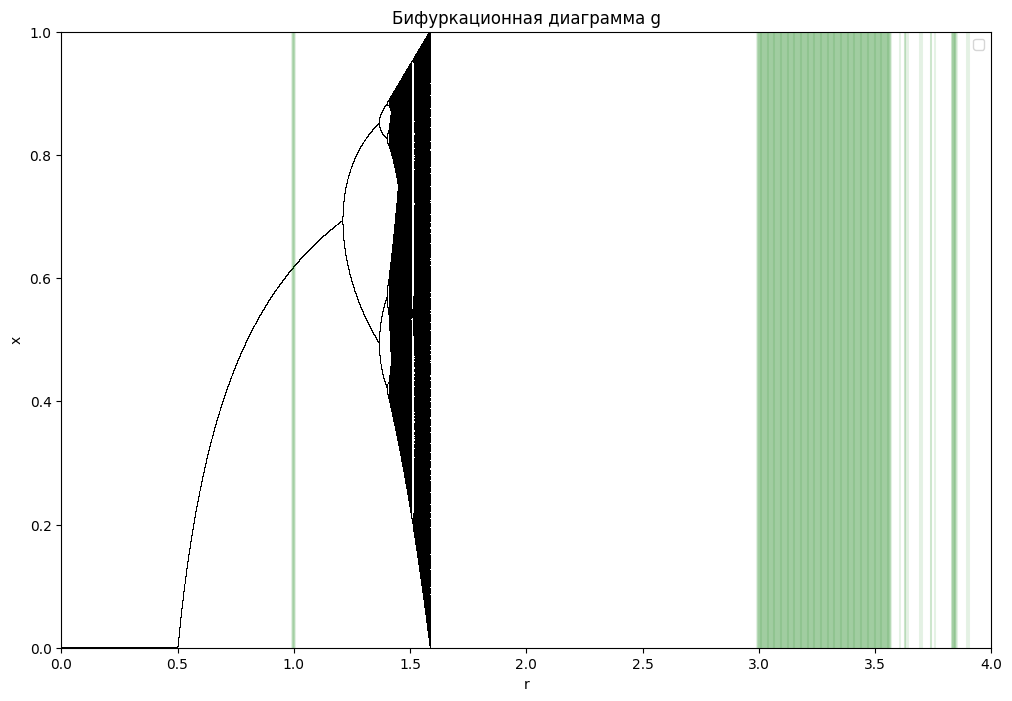

In [58]:
plt.figure(figsize=(12, 8))
bifurcation_diagram(func=g, x0=0.5, n_iterations=1000, n_last=100)
plt.legend()
highlight_windows(func=f, x0=0.5, n_iterations=1000, n_last=200,
                  r_range=(0, 4))